<a href="https://colab.research.google.com/github/LeonardoSantos944/Projetos_Data_Science/blob/main/Analisando_os_dados_do_Airbnb_(Amsterd%C3%A3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Amsterdã

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a maior empresa hoteleira da atualidade, mesmo não possuindo nenhum hotel.

Fazendo a conexão entre pessoas que buscam hospedágem e pessoas que querem alugar seus imóveis de forma prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedágem alternativa e com isso fazendo com que muitos ddestinos ainda não tão populares pudessem receber mais pessoas.

No final de 2020, a startup fundada em 2008, já havia feito mais de 852 milhões de reservas, assim destacando o potencial de fidelização de clientes pela empresa.

Uma das iniciativas da empresa é disponibilizar dados no site, para algumas das principais cidades do mundo.Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Amsterdã, e ver quais insights podem ser extraídos a partir de dados brutos.**





## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:
* `listing.csv` - *Summary information and metrics for listings in Amsterdã (good for  visualisations).*

In [1]:
# Importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-04-09/visualisations/listings.csv") 

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,59,3,278,2020-02-14,1.90,1,152
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,200,1,339,2020-04-09,2.50,2,0
2,25428,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",56142,Joan,NaN,Centrum-West,52.37490,4.88487,Entire home/apt,125,14,5,2020-02-09,0.13,2,132
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,141,2,219,2020-07-25,1.94,1,66
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,336,2020-09-20,2.59,2,335


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com as mesmas 17825 entradas e 74 variáveis (`listings.csv.gz`).

In [4]:
# Identificando o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# Verificando as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 17825
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em pouco mais de 10% das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 3,0% dos valores nulos.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.134642
last_review                       0.134642
host_name                         0.033380
name                              0.001795
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

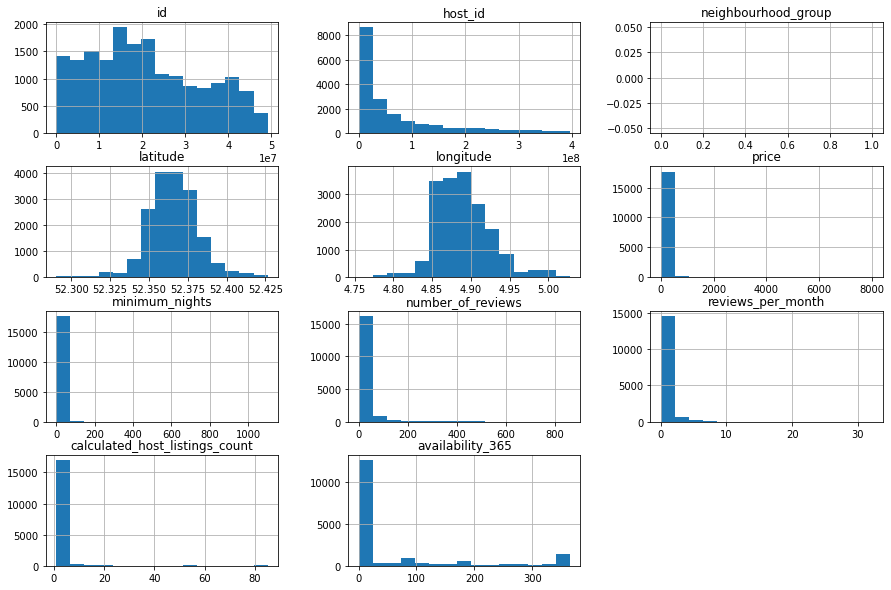

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [7]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,17825.000000,17825.000000,17825.000000,15425.000000,17825.000000,17825.000000
mean,154.495877,3.867041,23.952875,0.562200,2.684376,61.448247
std,154.162566,18.732039,54.831150,1.017706,8.813855,114.424897
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,95.000000,2.000000,2.000000,0.120000,1.000000,0.000000
50%,129.000000,2.000000,8.000000,0.260000,1.000000,0.000000
75%,180.000000,3.000000,21.000000,0.540000,1.000000,83.000000
max,8000.000000,1100.000000,860.000000,32.190000,85.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 180, porém seu valor máximo é 8000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

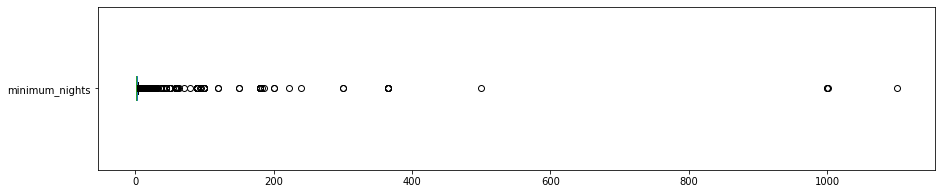

minimum_nights: valores acima de 30:
95 entradas
0.5330%


In [8]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price


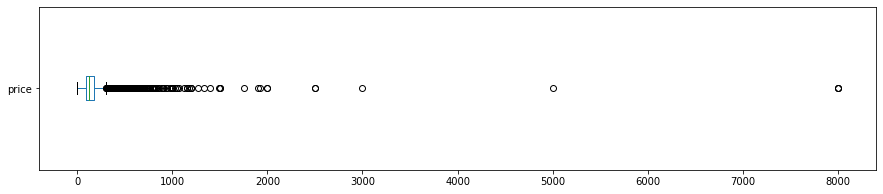


price: valores acima de 1500
12 entradas
0.0673%


In [9]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

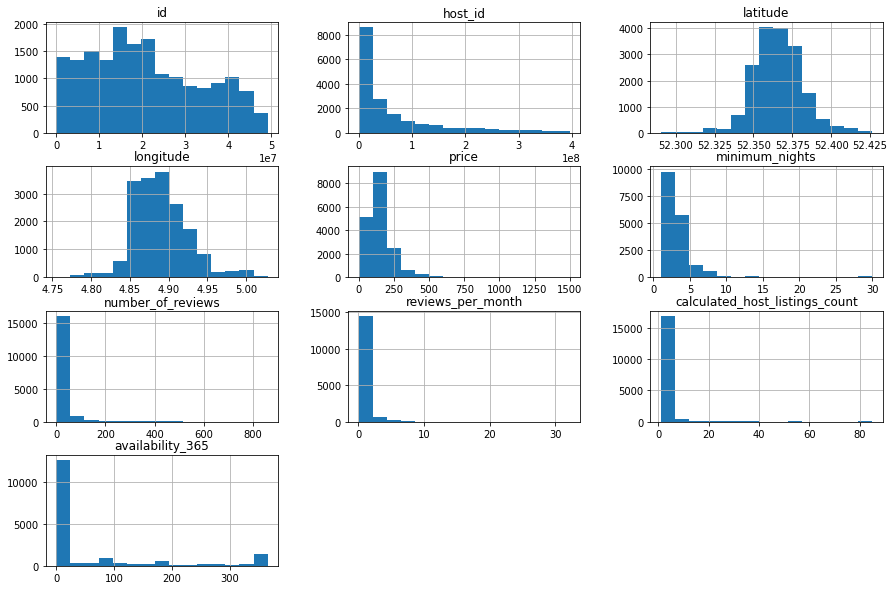

In [10]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [11]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.000028,-0.110379,-0.137615,0.067262,0.102415
minimum_nights,0.000028,1.000000,-0.071465,-0.098483,-0.029693,0.014094
number_of_reviews,-0.110379,-0.071465,1.000000,0.836486,-0.026998,0.263606
reviews_per_month,-0.137615,-0.098483,0.836486,1.000000,-0.005128,0.309832
calculated_host_listings_count,0.067262,-0.029693,-0.026998,-0.005128,1.000000,0.015300
availability_365,0.102415,0.014094,0.263606,0.309832,0.015300,1.000000


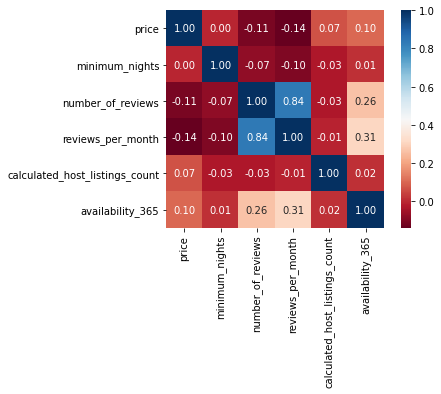

In [12]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [13]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    13812
Private room        3734
Hotel room           124
Shared room           49
Name: room_type, dtype: int64

In [14]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.779502
Private room       0.210734
Hotel room         0.006998
Shared room        0.002765
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Amsterdã?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [15]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Centrum-Oost                177.318489
Centrum-West                174.933097
Zuid                        168.032749
IJburg - Zeeburgereiland    166.741546
De Pijp - Rivierenbuurt     159.299230
Oud-Noord                   157.039316
De Aker - Nieuw Sloten      152.000000
Westerpark                  150.461597
Watergraafsmeer             149.859316
De Baarsjes - Oud-West      148.226364
Name: price, dtype: float64

Acima, temos a média de preço dos bairros com locação mais caras de Amsterdã e mesmo o bairro **Zuid** sendo o mais caro e luxuoso da cidade fica apenas em terceiro lugar na média de valores e número de acomodações.

In [16]:
# ver quantidade de imóveis no Centrum-Oost
print("Imóveis em Centrum-Oost:\t {}".format(df_clean[df_clean.neighbourhood == "Centrum-Oost"].shape))

# ver a quantidade de imóveis no Centrum-West
print("Imóveis em Centrum-West:\t {}".format(df_clean[df_clean.neighbourhood == "Centrum-West"].shape))

# ver a quantidade de imóveis no Zuid
print("Imóveis em Zuid:\t {}".format(df_clean[df_clean.neighbourhood == "Zuid"].shape))


Imóveis em Centrum-Oost:	 (1482, 15)
Imóveis em Centrum-West:	 (1973, 15)
Imóveis em Zuid:	 (1313, 15)


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

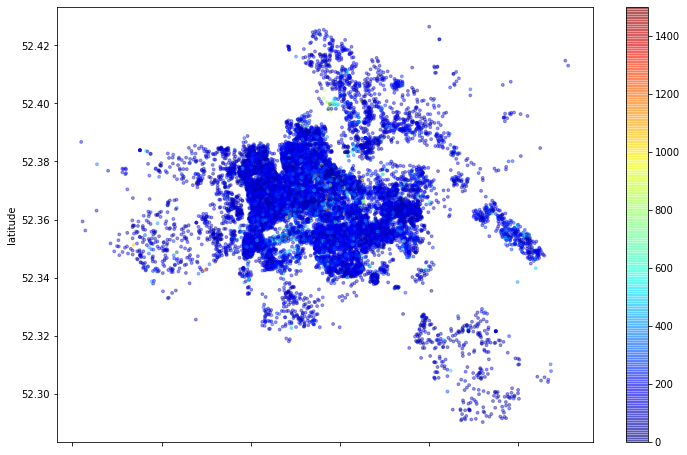

In [17]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Aqui foi feita apenas uma análise superficial na base de dados do Airbnb, onde já foi possível notar que enquanto em alguns locais tem uma grande quantidade de imóveis, temos outras com poucos imóveis, o que pode causar alterações nos resultados.

Mas não podemos ignorar o fato de que este é um *dataset* em versão reduzida e que que para se ter uma melhor análise e com valores mais próximos da realidade seria necessário o uso do conjunto de dados completo, assim tendo uma análise exploratória com dados muito mais satisfatórios.